In [ ]:
# Linux Package Installation
!apt-get -qq -y install fonts-nanum > /dev/null

# Delete Cache
!rm -rf ~/.cache/matplotlib -rf

In [ ]:
import os

os.kill(os.getpid(), 9)

In [ ]:
from collections import Counter
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

Mounted at /content/drive


# 데이터 불러오기

In [ ]:
DF_Final = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF_Final['product'] = DF_Final['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF = DF_Final.copy()

In [ ]:
DF['tags'].value_counts()
# 62세 이상의 소비자 >> Older American
# 주 방위군 또는 예비역뿐만 아니라 이전에 복무하고 퇴역한 모든 사람 + 그 배우자 + 부양가족 >> Servicemember

tags
Servicemember                    108825
Older American                    40500
Older American, Servicemember     13334
Name: count, dtype: int64

# 1. Old

In [ ]:
DF_tag = DF[DF['tags'].notna()]
DF_old = DF_tag[DF_tag['tags'] != 'Servicemember']
DF_old

,date received,product,sub-product,issue,sub-issue,consumer complaint narrative,company public response,company,state,zip code,...,consumer consent provided,submitted via,date sent to company,company response to consumer,timely response,consumer disputed,complaint id,year,month,day
13,2024-02-10,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Card was charged for something you did not pur...,Dear Amex Subject : Urgent Follow-Up - Dispute...,NaN,AMERICAN EXPRESS COMPANY,CA,93035,...,Consent provided,Web,02/10/24,Closed with explanation,Yes,NaN,8322653.0,2024,2,10
14,2024-02-23,Credit card,Store credit card,Problem when making payments,Problem during payment process,Being a 22+ Amazon Prime member I opted to tak...,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,TN,385XX,...,Consent provided,Web,02/23/24,Closed with explanation,Yes,NaN,8411318.0,2024,2,23
42,2024-01-22,Credit card,Store credit card,Problem when making payments,Problem during payment process,this all started in XX/XX/2022 I had been maki...,NaN,SYNCHRONY FINANCIAL,IN,46158,...,Consent provided,Web,01/24/24,In progress,Yes,NaN,8203867.0,2024,1,22
58,2024-01-29,Credit card,Store credit card,Closing your account,Can't close your account,XX/XX/XXXX Note : Synchrony will not return ou...,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,FL,337XX,...,Consent provided,Web,01/29/24,Closed with explanation,Yes,NaN,8245932.0,2024,1,29
60,2023-12-21,Credit card,General-purpose credit card or charge card,Closing your account,Company closed your account,On XX/XX/XXXX I attempted to pay my Chase Cred...,NaN,JPMORGAN CHASE & CO.,GA,30144,...,Consent provided,Web,12/21/23,Closed with explanation,Yes,NaN,8041185.0,2023,12,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326490,2023-09-10,Checking or savings account,Checking account,Managing an account,Problem making or receiving payments,Hi.\n\nAt end of XX/XX/XXXX Bank of America s...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,083XX,...,Consent provided,Web,09/10/23,Closed with monetary relief,Yes,NaN,7528538.0,2023,9,10
1326497,2023-09-23,Checking or savings account,Other banking product or service,Problem with a lender or other company chargin...,Money was taken from your account on the wrong...,"In XXXX, the XXXX XXXX XXXX banked with XXXX B...",Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,CA,92404,...,Consent provided,Web,10/10/23,Closed with explanation,Yes,NaN,7594814.0,2023,9,23
1326499,2023-02-21,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,Below is a list of charges that was withdraw f...,NaN,JPMORGAN CHASE & CO.,TX,77091,...,Consent provided,Web,02/21/23,Closed with explanation,Yes,NaN,6597458.0,2023,2,21
1326513,2023-11-08,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Non-sufficient funds and associated fees,"I was a Victim of Fraud my Account, Husband an...",NaN,JPMORGAN CHASE & CO.,FL,33025,...,Consent provided,Web,11/08/23,Closed with explanation,Yes,NaN,7818507.0,2023,11,8




*  연도별로 은행 리뷰 작성자 중 62세 이상 계층이 증가하는 경향 -> 은행은 노인층을 대상으로 한 리뷰 참여를 촉진하기 위한 새로운 전략을 고려할 필요가 있어보임.


*  cf. 전체 작성자
year
2023    175526
2024     65948
2021     42309
2022     34940
2020     21632
2019     17485


In [ ]:
DF_old['year'].value_counts()

year
2023    13121
2022     9651
2021     8809
2020     7306
2019     6223
2018     5931
2024     2793
Name: count, dtype: int64

* 2023년 주요 이슈 정리
2023년 3월 8일 실버게이트 은행 파산

2023년 3월 10일 실리콘벨리 은행 파산

-> 3월 9일~13일 3거래일 연속 지역 은행 주가 일제히 폭락

ex) 퍼스트리퍼블릭 은행, 웨스턴 얼라이언스 뱅코프, 팩웨스트 뱅코프, 자이언스 뱅코프, 코메리카, 찰스 슈왑

2023년 3월 12일 시그니처 은행 파산

2023년 5월 1일 퍼스트리퍼블릭 은행 파산

7월 팩웨스트 뱅코프가 뱅크 오브 캘리포니아에 합병

10월 이스라엘 - 하마스 전쟁

=> 2023년 4분기 기준 미국 은행 부실 52곳에 달함

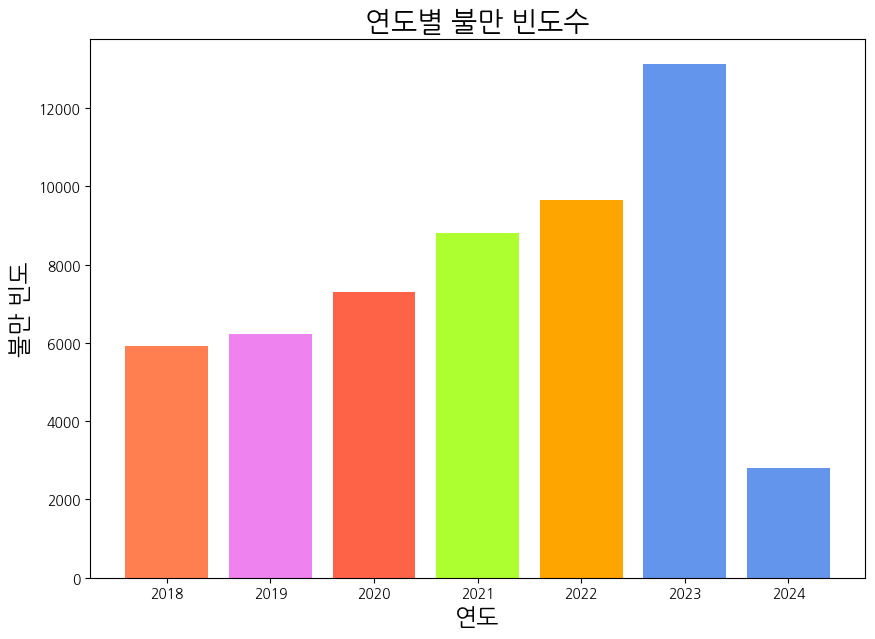

In [ ]:
color = ['cornflowerblue','orange','greenyellow','tomato','violet','coral']
plt.figure(figsize = (10, 7))
plt.bar(DF_old['year'].value_counts().index,
        DF_old['year'].value_counts().values,
        color = color)
plt.title('연도별 불만 빈도수',fontsize = 20)
plt.xlabel('연도', fontsize = 17)
plt.ylabel('불만 빈도', fontsize = 17)
plt.show()

In [ ]:
DF_old_2018V = DF_old[DF_old['year'] == 2018]['product'].value_counts()
DF_old_2019V = DF_old[DF_old['year'] == 2019]['product'].value_counts()
DF_old_2020V = DF_old[DF_old['year'] == 2020]['product'].value_counts()
DF_old_2021V = DF_old[DF_old['year'] == 2021]['product'].value_counts()
DF_old_2022V = DF_old[DF_old['year'] == 2022]['product'].value_counts()
DF_old_2023V = DF_old[DF_old['year'] == 2023]['product'].value_counts()
DF_old_2024V = DF_old[DF_old['year'] == 2024]['product'].value_counts()



*   payday loans - 급여 담보 대출

*   vehicle loan or lease - 차량 대출

*   student loan - 학자금 대출

*   money transfer - 송금

*   debt collection - 채권 추심

*   mortgage - 저당

*   credit reporting - 신용보고

*   checking or saving accounts - 계좌 확인

*   credit card - 신용 카드


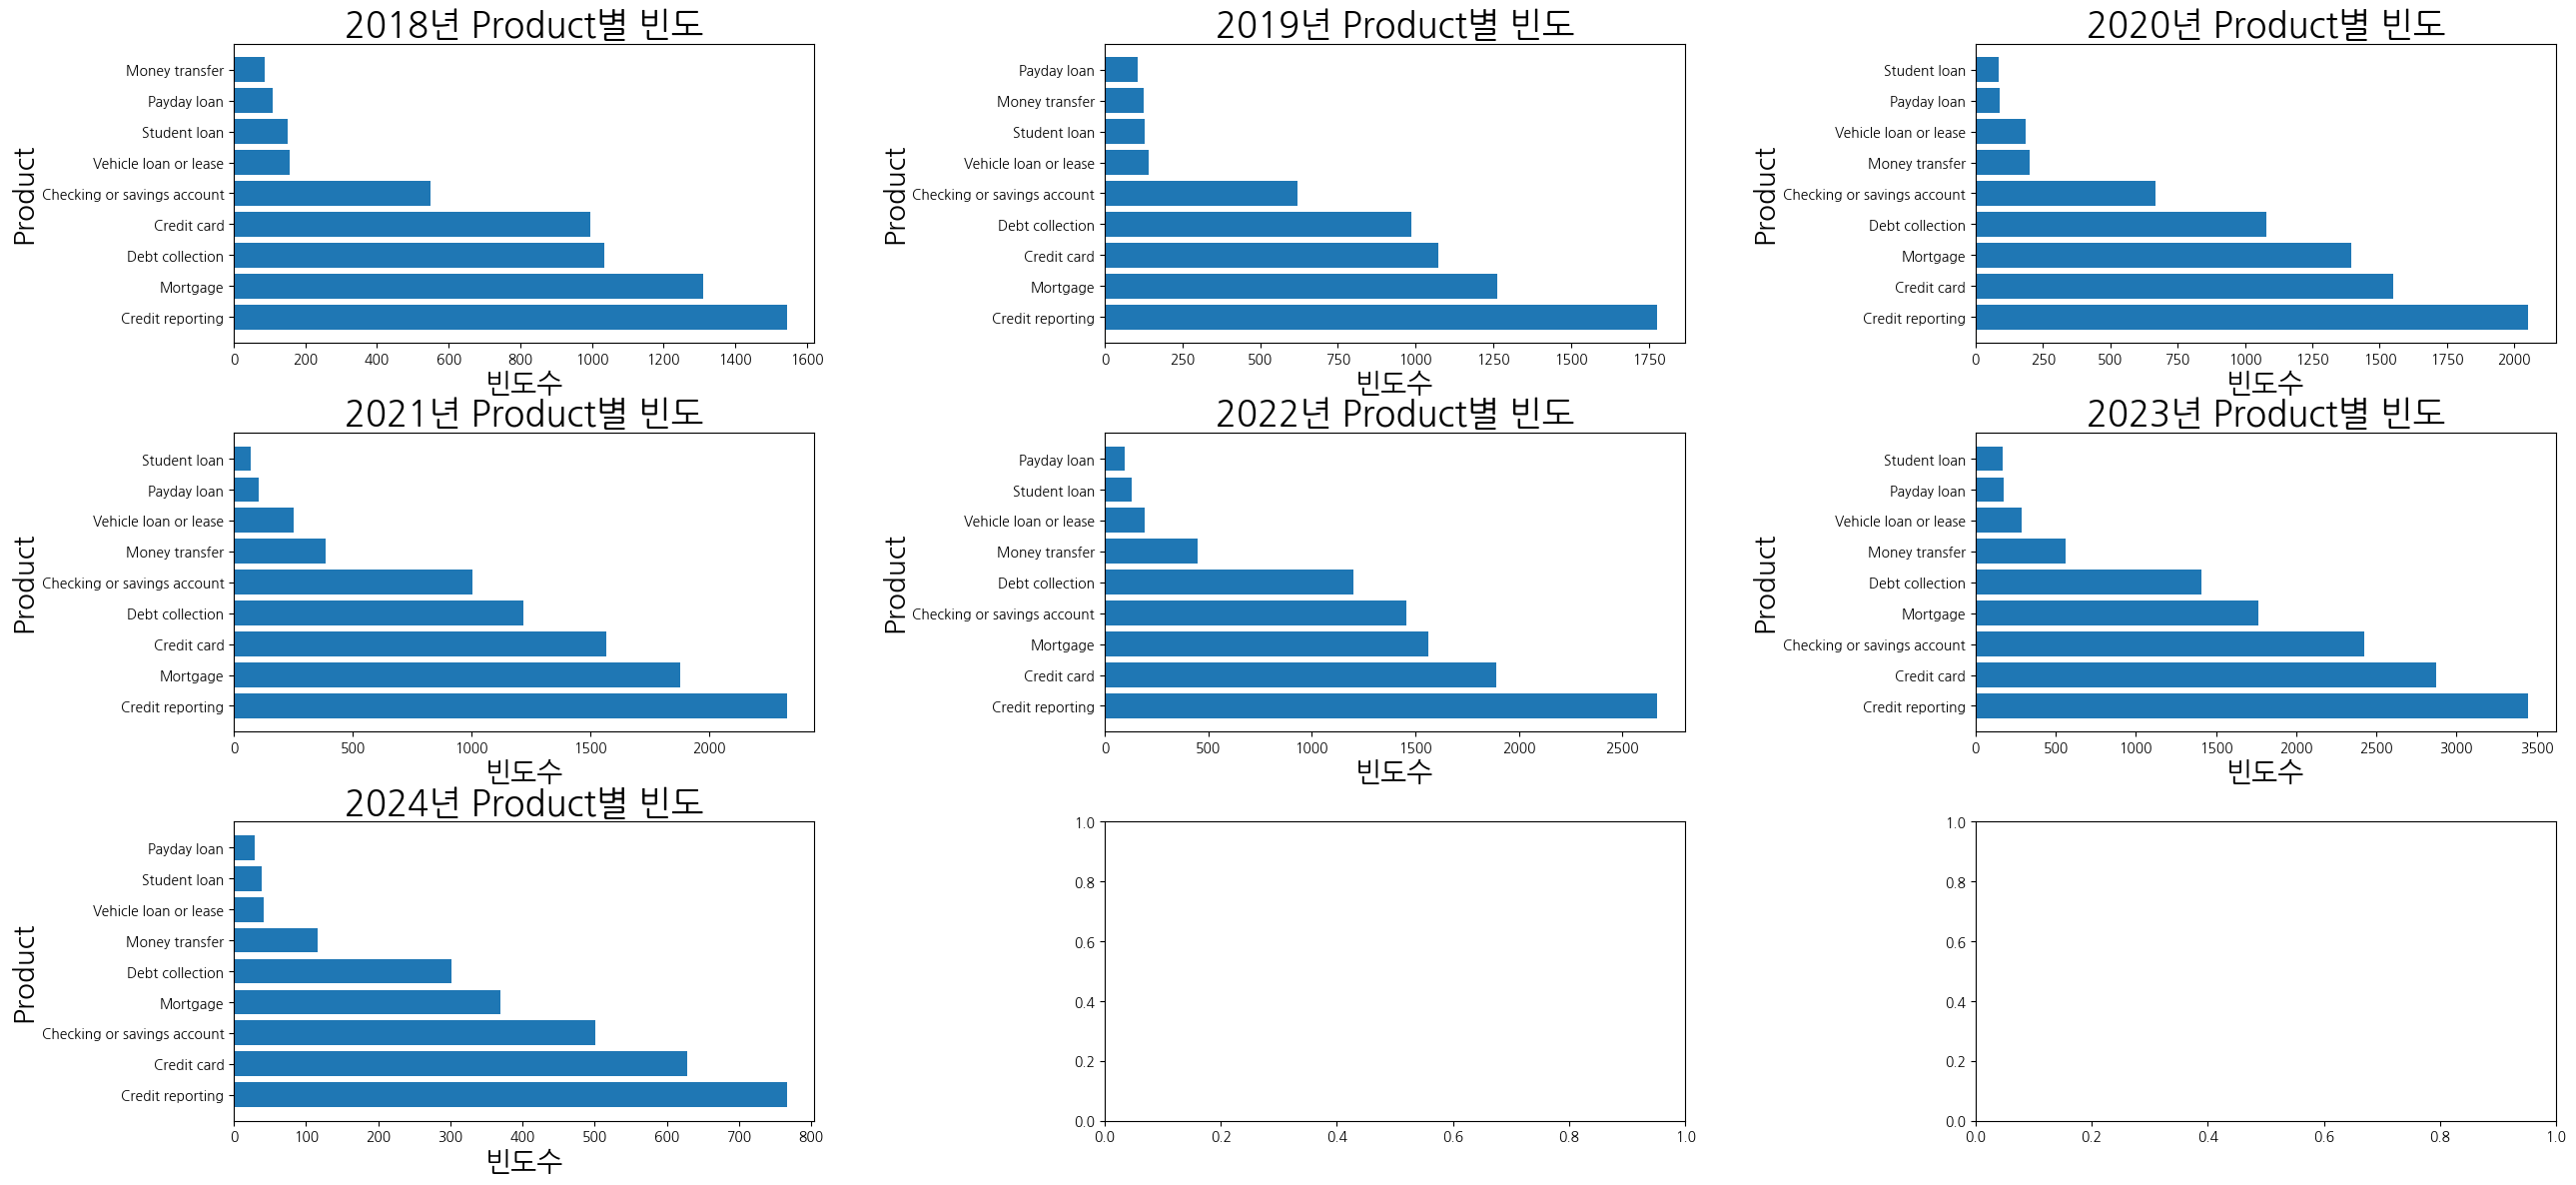

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 14))
fig.subplots_adjust(wspace=0.5, hspace=0.3) # 그래프 사이 간격 조절(0~1)


ax[0,0].barh(DF_old_2018V.index,
        DF_old_2018V.values)
ax[0,1].barh(DF_old_2019V.index,
        DF_old_2019V.values)
ax[0,2].barh(DF_old_2020V.index,
        DF_old_2020V.values)
ax[1,0].barh(DF_old_2021V.index,
        DF_old_2021V.values)
ax[1,1].barh(DF_old_2022V.index,
        DF_old_2022V.values)
ax[1,2].barh(DF_old_2023V.index,
        DF_old_2023V.values)
ax[2,0].barh(DF_old_2024V.index,
        DF_old_2024V.values)

ax[0,0].set_title('2018년 Product별 빈도', size = 25)
ax[0,1].set_title('2019년 Product별 빈도', size = 25)
ax[0,2].set_title('2020년 Product별 빈도', size = 25)
ax[1,0].set_title('2021년 Product별 빈도', size = 25)
ax[1,1].set_title('2022년 Product별 빈도', size = 25)
ax[1,2].set_title('2023년 Product별 빈도', size = 25)
ax[2,0].set_title('2024년 Product별 빈도', size = 25)

ax[0,0].set_xlabel('빈도수',fontsize = 20)
ax[0,1].set_xlabel('빈도수',fontsize = 20)
ax[0,2].set_xlabel('빈도수',fontsize = 20)
ax[1,0].set_xlabel('빈도수',fontsize = 20)
ax[1,1].set_xlabel('빈도수',fontsize = 20)
ax[1,2].set_xlabel('빈도수',fontsize = 20)
ax[2,0].set_xlabel('빈도수',fontsize = 20)

ax[0,0].set_ylabel('Product',fontsize = 20)
ax[0,1].set_ylabel('Product',fontsize = 20)
ax[0,2].set_ylabel('Product',fontsize = 20)
ax[1,0].set_ylabel('Product',fontsize = 20)
ax[1,1].set_ylabel('Product',fontsize = 20)
ax[1,2].set_ylabel('Product',fontsize = 20)
ax[2,0].set_ylabel('Product',fontsize = 20)


plt.show()

* credit card 와 mortage 는 매 연도마다 produnt별 빈도 상위권에 랭크됨

* 대출(loan) 관련 리뷰 빈도가 product별 중에서는 적은 비율을 차지한다는 것을 알 수 있다.




company response to consumer	timely response	consumer disputed

In [ ]:
DF_old['company response to consumer'].value_counts()

company response to consumer
Closed with explanation            42813
Closed with non-monetary relief     5862
Closed with monetary relief         4991
Untimely response                    140
In progress                           28
Name: count, dtype: int64

In [ ]:
DF_old['timely response'].value_counts()

timely response
Yes    53113
No       721
Name: count, dtype: int64

# 2.Old+Service

In [ ]:
DF_tag['year'].value_counts()

year
2023    15891
2024     5699
2021     5352
2022     3226
2020     3009
2019     2887
Name: count, dtype: int64

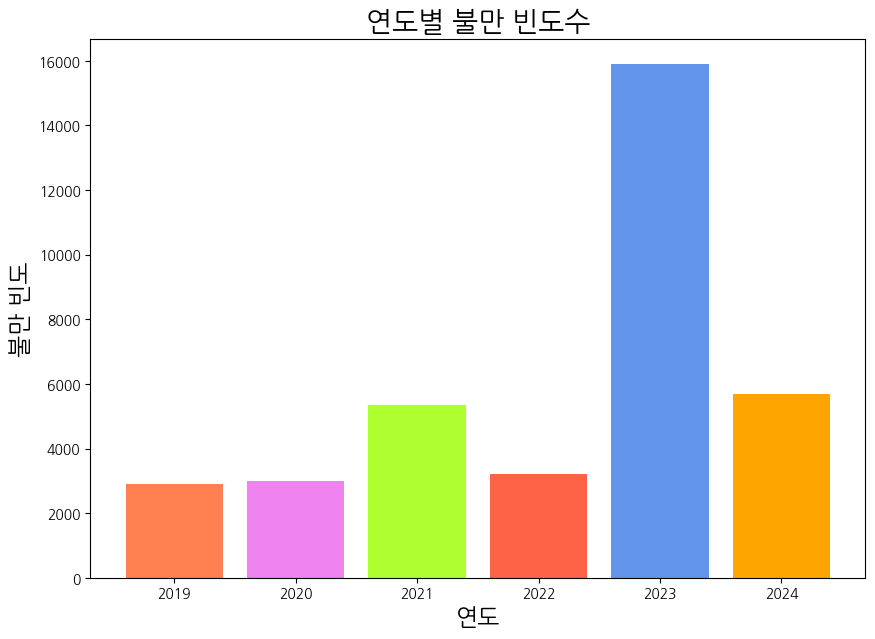

In [ ]:
color = ['cornflowerblue','orange','greenyellow','tomato','violet','coral']
plt.figure(figsize = (10, 7))
plt.bar(DF_tag['year'].value_counts().index,
        DF_tag['year'].value_counts().values,
        color = color)
plt.title('연도별 불만 빈도수',fontsize = 20)
plt.xlabel('연도', fontsize = 17)
plt.ylabel('불만 빈도', fontsize = 17)
plt.show()

In [ ]:
DF_tag_2019V = DF_tag[DF_tag['year'] == 2019]['product'].value_counts()
DF_tag_2020V = DF_tag[DF_tag['year'] == 2020]['product'].value_counts()
DF_tag_2021V = DF_tag[DF_tag['year'] == 2021]['product'].value_counts()
DF_tag_2022V = DF_tag[DF_tag['year'] == 2022]['product'].value_counts()
DF_tag_2023V = DF_tag[DF_tag['year'] == 2023]['product'].value_counts()
DF_tag_2024V = DF_tag[DF_tag['year'] == 2024]['product'].value_counts()

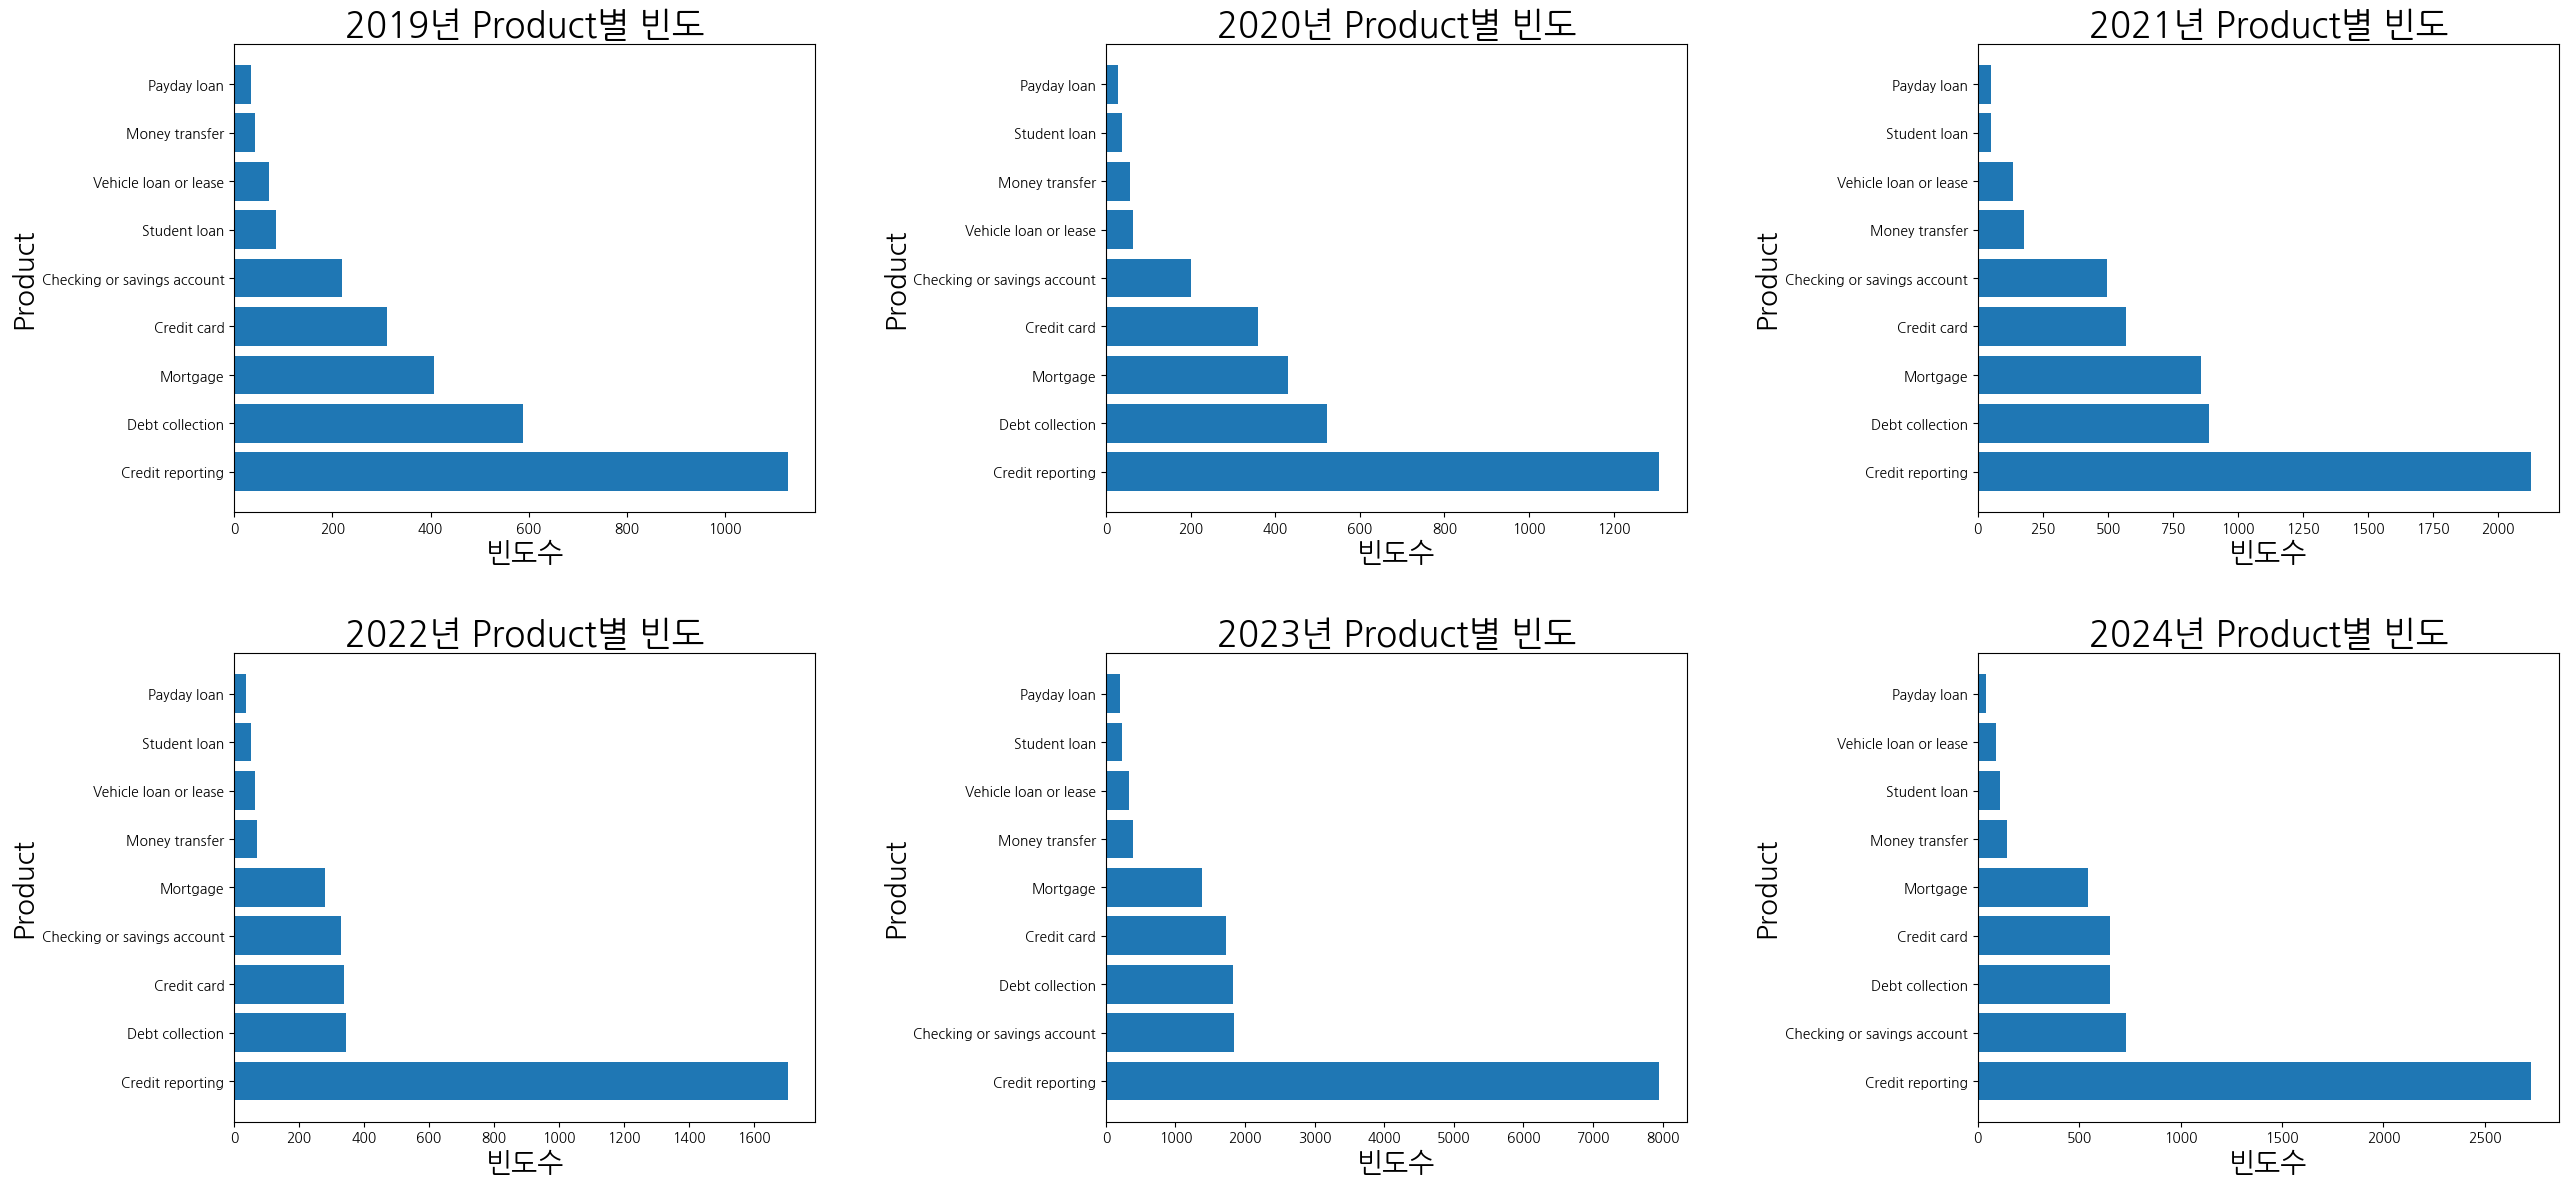

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 14))
fig.subplots_adjust(wspace=0.5, hspace=0.3) # 그래프 사이 간격 조절(0~1)

ax[0,0].barh(DF_tag_2019V.index,
        DF_tag_2019V.values)
ax[0,1].barh(DF_tag_2020V.index,
        DF_tag_2020V.values)
ax[0,2].barh(DF_tag_2021V.index,
        DF_tag_2021V.values)
ax[1,0].barh(DF_tag_2022V.index,
        DF_tag_2022V.values)
ax[1,1].barh(DF_tag_2023V.index,
        DF_tag_2023V.values)
ax[1,2].barh(DF_tag_2024V.index,
        DF_tag_2024V.values)

ax[0,0].set_title('2019년 Product별 빈도', size = 25)
ax[0,1].set_title('2020년 Product별 빈도', size = 25)
ax[0,2].set_title('2021년 Product별 빈도', size = 25)
ax[1,0].set_title('2022년 Product별 빈도', size = 25)
ax[1,1].set_title('2023년 Product별 빈도', size = 25)
ax[1,2].set_title('2024년 Product별 빈도', size = 25)

ax[0,0].set_xlabel('빈도수',fontsize = 20)
ax[0,1].set_xlabel('빈도수',fontsize = 20)
ax[0,2].set_xlabel('빈도수',fontsize = 20)
ax[1,0].set_xlabel('빈도수',fontsize = 20)
ax[1,1].set_xlabel('빈도수',fontsize = 20)
ax[1,2].set_xlabel('빈도수',fontsize = 20)

ax[0,0].set_ylabel('Product',fontsize = 20)
ax[0,1].set_ylabel('Product',fontsize = 20)
ax[0,2].set_ylabel('Product',fontsize = 20)
ax[1,0].set_ylabel('Product',fontsize = 20)
ax[1,1].set_ylabel('Product',fontsize = 20)
ax[1,2].set_ylabel('Product',fontsize = 20)


plt.show()

* credit reporting 이 압도적으로 많은 리뷰 수를 보여주고 있다.


In [ ]:
DF_EC = DF_tag[DF_tag['product'] != 'Credit reporting']

In [ ]:
DF_2019V = DF_EC[DF_EC['year'] == 2019]['product'].value_counts()
DF_2020V = DF_EC[DF_EC['year'] == 2020]['product'].value_counts()
DF_2021V = DF_EC[DF_EC['year'] == 2021]['product'].value_counts()
DF_2022V = DF_EC[DF_EC['year'] == 2022]['product'].value_counts()
DF_2023V = DF_EC[DF_EC['year'] == 2023]['product'].value_counts()
DF_2024V = DF_EC[DF_EC['year'] == 2024]['product'].value_counts()

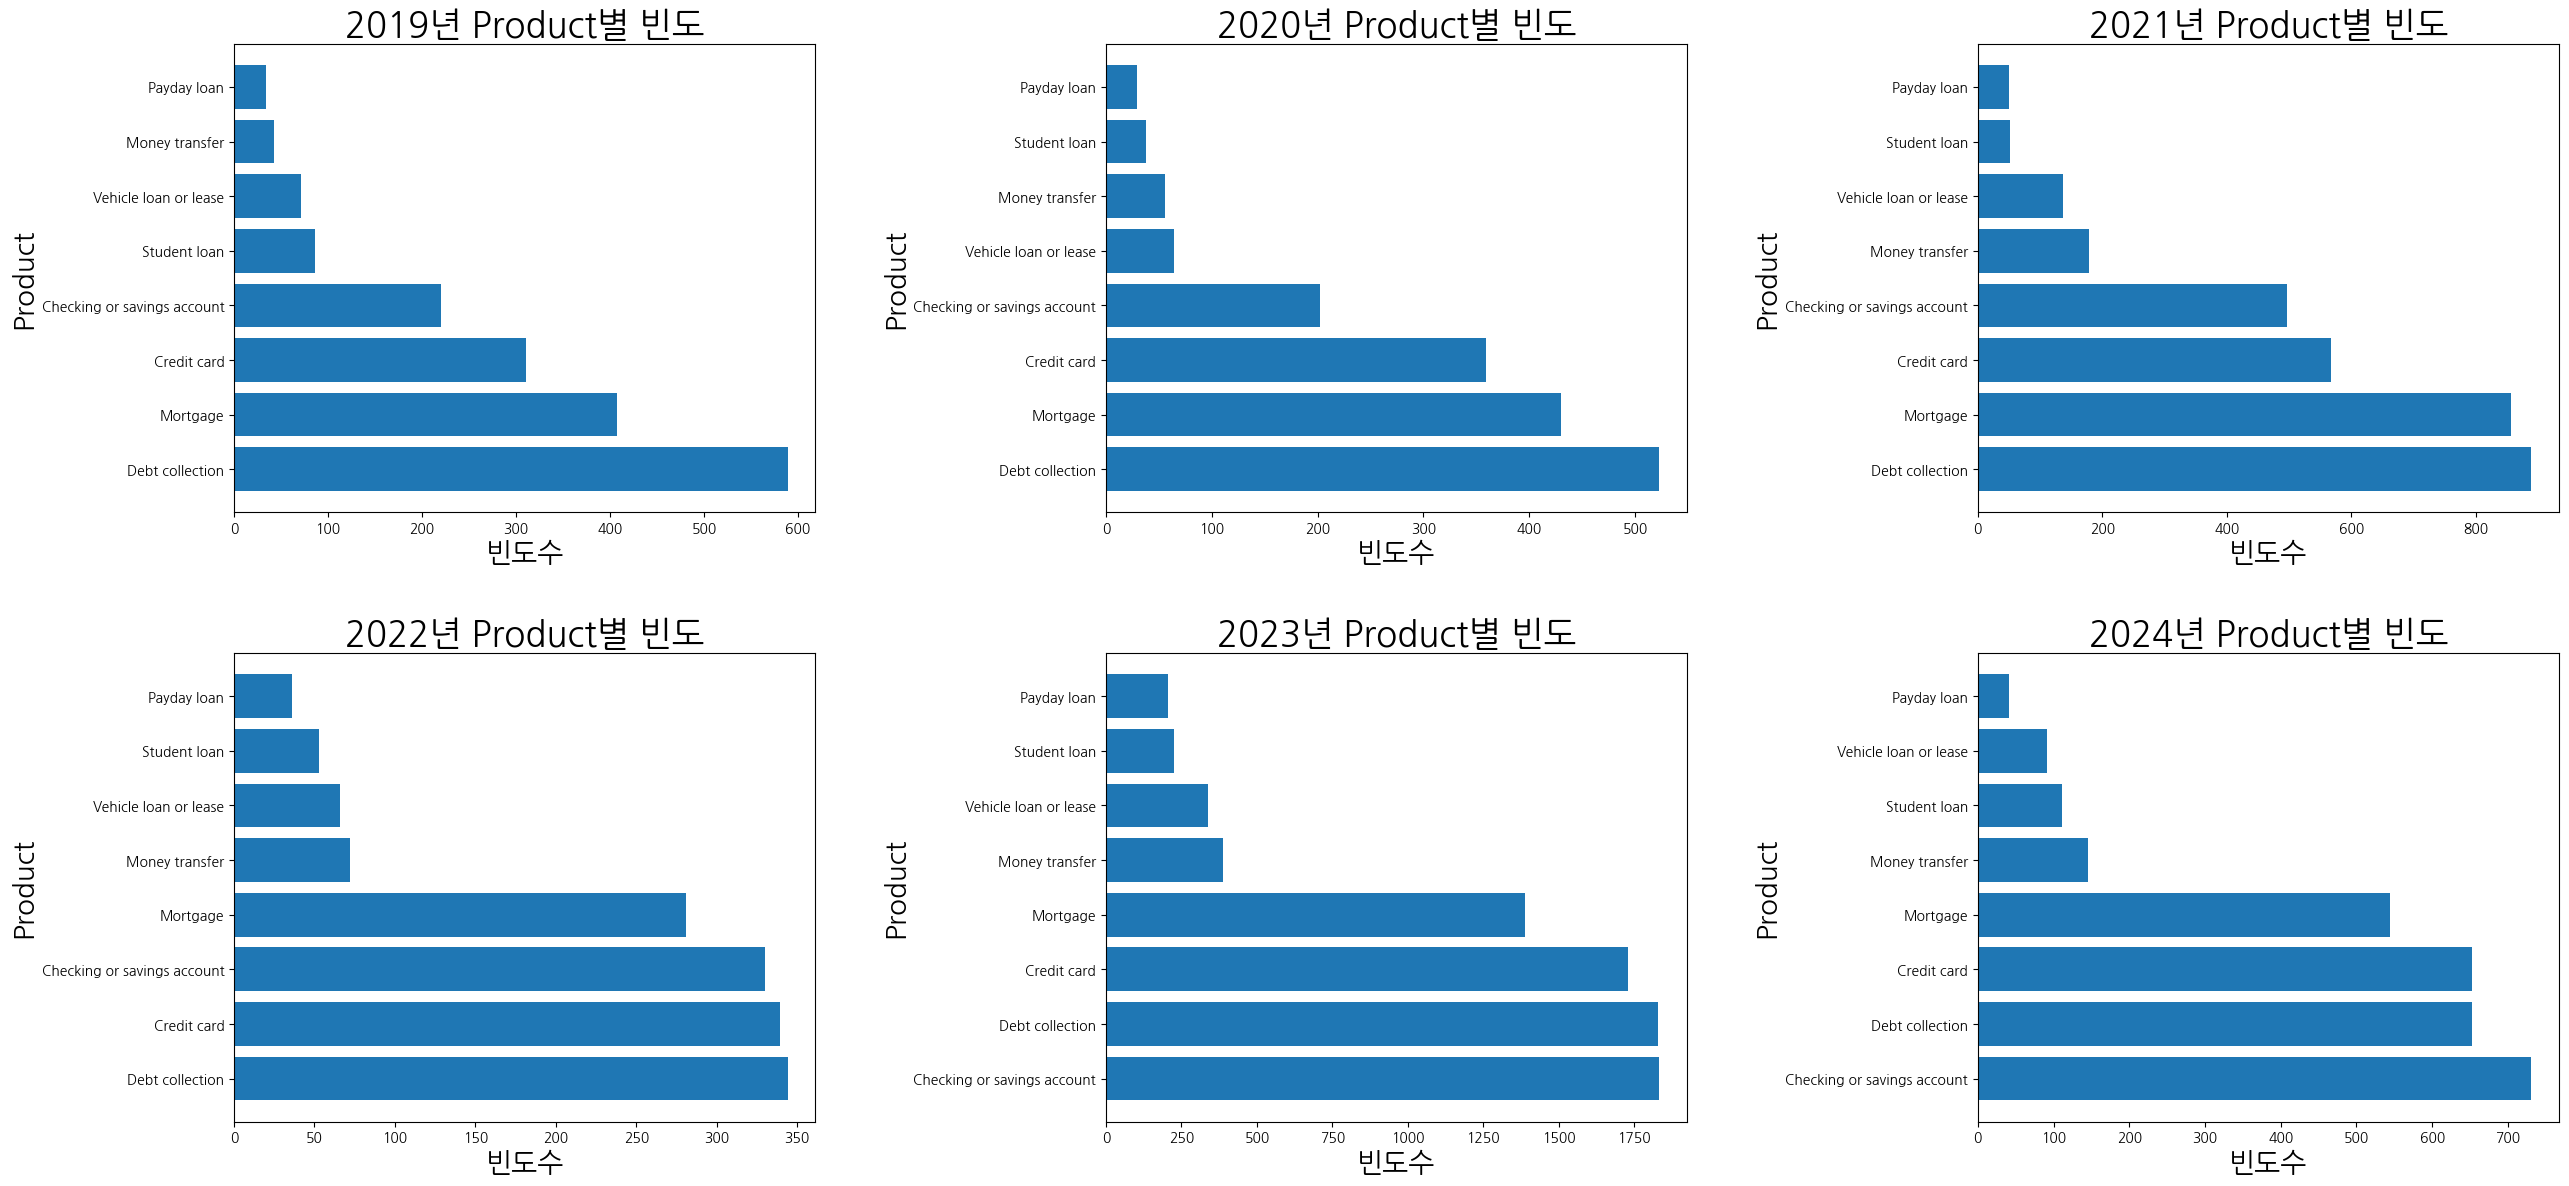

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 14))
fig.subplots_adjust(wspace=0.5, hspace=0.3) # 그래프 사이 간격 조절(0~1)

ax[0,0].barh(DF_2019V.index,
        DF_2019V.values)
ax[0,1].barh(DF_2020V.index,
        DF_2020V.values)
ax[0,2].barh(DF_2021V.index,
        DF_2021V.values)
ax[1,0].barh(DF_2022V.index,
        DF_2022V.values)
ax[1,1].barh(DF_2023V.index,
        DF_2023V.values)
ax[1,2].barh(DF_2024V.index,
        DF_2024V.values)

ax[0,0].set_title('2019년 Product별 빈도', size = 25)
ax[0,1].set_title('2020년 Product별 빈도', size = 25)
ax[0,2].set_title('2021년 Product별 빈도', size = 25)
ax[1,0].set_title('2022년 Product별 빈도', size = 25)
ax[1,1].set_title('2023년 Product별 빈도', size = 25)
ax[1,2].set_title('2024년 Product별 빈도', size = 25)

ax[0,0].set_xlabel('빈도수',fontsize = 20)
ax[0,1].set_xlabel('빈도수',fontsize = 20)
ax[0,2].set_xlabel('빈도수',fontsize = 20)
ax[1,0].set_xlabel('빈도수',fontsize = 20)
ax[1,1].set_xlabel('빈도수',fontsize = 20)
ax[1,2].set_xlabel('빈도수',fontsize = 20)

ax[0,0].set_ylabel('Product',fontsize = 20)
ax[0,1].set_ylabel('Product',fontsize = 20)
ax[0,2].set_ylabel('Product',fontsize = 20)
ax[1,0].set_ylabel('Product',fontsize = 20)
ax[1,1].set_ylabel('Product',fontsize = 20)
ax[1,2].set_ylabel('Product',fontsize = 20)


plt.show()

전체 컴플레인 수 = 12,372

전체 해결된 컴플레인 수 = 9492 + 1553 + 1274

전체 해결율 = (12,319 / 12,372) * 100%

전체 해결율 ≈ 99.57%

In [ ]:
DF_old['company response to consumer'].value_counts()

company response to consumer
Closed with explanation            9492
Closed with non-monetary relief    1553
Closed with monetary relief        1274
Untimely response                    28
In progress                          25
Name: count, dtype: int64

In [ ]:
DF_old['company public response'].value_counts()

company public response
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            5928
Company believes it acted appropriately as authorized by contract or law                                                    706
Company believes the complaint is the result of a misunderstanding                                                           51
Company believes the complaint provided an opportunity to answer consumer's questions                                        46
Company believes complaint is the result of an isolated error                                                                37
Company believes complaint represents an opportunity for improvement to better serve consumers                               27
Company believes complaint caused principally by actions of third party outside the control or direction of the company      25
Company disputes the facts presented in the complaint                           

In [ ]:
DF['company public response'].value_counts()

company public response
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            186799
Company believes it acted appropriately as authorized by contract or law                                                     9926
Company believes the complaint is the result of a misunderstanding                                                            766
Company disputes the facts presented in the complaint                                                                         724
Company believes the complaint provided an opportunity to answer consumer's questions                                         518
Company believes complaint caused principally by actions of third party outside the control or direction of the company       357
Company believes complaint represents an opportunity for improvement to better serve consumers                                282
Company believes complaint is the result of an isolated error     

Closed with explanation(설명과 함께 종료): 216,693

Closed with non-monetary relief(비금전적 해결과 함께 종료): 113,730

Closed with monetary relief (금전적 보상과 함께 종료): 9,057

따라서 전체 해결된 컴플레인 수는 216,693 + 113,730 + 9,057 = 339,480개

In progress (진행 중) : 1444

Untimely response (제때 못한 응답) : 823

해결율 = (해결된 컴플레인 수) / (전체 컴플레인 수)

       = (339,480 / 357,863) * 100% = 약 94.86%


In [ ]:
DF['company response to consumer'].value_counts()

company response to consumer
Closed with explanation            216693
Closed with non-monetary relief    113730
Closed with monetary relief          9057
In progress                          1444
Untimely response                     823
Name: count, dtype: int64

민원에 대해 제때 응답이 진행되었다는 반응이 99% 으로 압도적으로 많았다.

In [ ]:
DF['timely response'].value_counts()

timely response
Yes    339014
No       2735
Name: count, dtype: int64